# Lifetime Dog Licenses

Source: 

https://data.wprdc.org/dataset/allegheny-county-dog-licenses/resource/f8ab32f7-44c7-43ca-98bf-c1b444724598

## Section I: Regex Workshop

Reference:
- https://docs.python.org/3/howto/regex.html
- https://docs.python.org/3/library/re.html

In [51]:
# Vanilla Python

import csv
import re
import itertools

# Constants

data = 'data/lifetime_dog_licenses.tsv'

# Functions

def match_string(string, data):
    exp = re.compile(rf'{string}.*', re.IGNORECASE)
    return exp.match(data)
    
def match_begin_end_with_go(data):
    exp = re.compile(r'.*go.*go', re.IGNORECASE)
    return exp.match(data)

def match_begin_end_with_same_letter(data):
    exp = re.compile(r'^([a-zA-Z]).*\1$', re.IGNORECASE)
    return exp.match(data)

def iterate(reader, column_name, func):
    count = 0
    match_list = []
    for row in reader:
        column = row[column_name]
        match = func(column)
        if match:
            count += 1
            match_list.append(match.group(0))
    return count, match_list

In [53]:
# View snapshot of data
with open(data) as dogtags: 
    reader = csv.DictReader(dogtags, delimiter='\t')
    for row in itertools.islice(reader, 5):
        print(row)

OrderedDict([('LicenseType', 'Dog Lifetime Spayed Female'), ('Breed', 'LABRADOR RETRIEVER'), ('Color', 'YELLOW'), ('DogName', 'SASHA'), ('OwnerZip', '15137'), ('ExpYear', '2099'), ('ValidDate', '2005-01-31T00:00:00')])
OrderedDict([('LicenseType', 'Dog Lifetime Neutered Male'), ('Breed', 'LABRADOR RETRIEVER'), ('Color', 'BROWN'), ('DogName', 'JAKE'), ('OwnerZip', '15129'), ('ExpYear', '2099'), ('ValidDate', '2004-06-21T00:00:00')])
OrderedDict([('LicenseType', 'Dog Lifetime Spayed Female'), ('Breed', 'MIXED'), ('Color', 'SPOTTED'), ('DogName', 'SHILOH'), ('OwnerZip', '15129'), ('ExpYear', '2099'), ('ValidDate', '2006-01-20T00:00:00')])
OrderedDict([('LicenseType', 'Dog Lifetime Spayed Female'), ('Breed', 'LAB MIX'), ('Color', 'BROWN'), ('DogName', 'BLONDIE'), ('OwnerZip', '15140'), ('ExpYear', '2099'), ('ValidDate', '2005-07-18T00:00:00')])
OrderedDict([('LicenseType', 'Dog Lifetime Spayed Female'), ('Breed', 'AUS SHEPHERD'), ('Color', 'MULTI'), ('DogName', 'SASHA'), ('OwnerZip', '1523

In [55]:
# Match any dog name with 'go' and then 'go' somewhere else in the name
with open(data) as dogtags:
    reader = csv.DictReader(dogtags, delimiter='\t')
    match_count_gogo, match_list_gogo = iterate(reader, 'DogName', match_begin_end_with_go)
    print(f'Matches: {match_count_gogo}', match_list_gogo)

Matches: 1 ['GOGO']


In [56]:
with open(data) as dogtags: 
    reader = csv.DictReader(dogtags, delimiter='\t')
    match_count_same_letter, match_list_same_letter = iterate(reader, 'DogName', match_begin_end_with_same_letter)
    print(f'Matches: {match_count_same_letter}', match_list_same_letter[:10])

Matches: 1062 ['OSO', 'KODIAK', 'ERNIE', 'OREO', 'OREO', 'ELLIE', 'ALLEGRA', 'SNICKERS', 'SEAMUS', 'NELSON']


---

## Section II: Matplotlib Workshop

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('data/lifetime_dog_licenses.tsv', sep='\t')
df.head()

,LicenseType,Breed,Color,DogName,OwnerZip,ExpYear,ValidDate
0,Dog Lifetime Spayed Female,LABRADOR RETRIEVER,YELLOW,SASHA,15137,2099,2005-01-31T00:00:00
1,Dog Lifetime Neutered Male,LABRADOR RETRIEVER,BROWN,JAKE,15129,2099,2004-06-21T00:00:00
2,Dog Lifetime Spayed Female,MIXED,SPOTTED,SHILOH,15129,2099,2006-01-20T00:00:00
3,Dog Lifetime Spayed Female,LAB MIX,BROWN,BLONDIE,15140,2099,2005-07-18T00:00:00
4,Dog Lifetime Spayed Female,AUS SHEPHERD,MULTI,SASHA,15238,2099,2004-02-25T00:00:00


In [62]:
dog_name_counts = df['DogName'].value_counts()
dog_name_counts[0]

429

In [ ]:
def plot_table(freq_table):
    """Plot table into a line chart using matplotlib
    Ref: https://matplotlib.org/examples/lines_bars_and_markers/barh_demo.html
    """
    fig, ax = plt.subplots()
    counts = freq_table.values()
    y_pos = range(len(freq_table.keys()))
    ax.barh(y_pos, counts, align='center')
    ax.tick_params(axis='y', which='major', pad=15)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(freq_table.keys())
    ax.invert_yaxis()  # labels read top-to-bottom
    ax.set_xlabel('Counts')

[0 3 1 5 3 8 6 9 5 9 1 1 7 5 1 4 0 0 6 3 6 3 4 9]


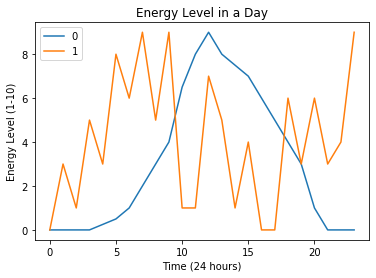

In [118]:
hours = range(0, 24)
energy_level = [0,0,0,0,0.25,0.5,1,2,3,4,6.5,8,9,8,7.5,7,6,5,4,3,1,0,0,0]
random = np.random.randint(10, size=24)
print(random)

def plot_table(X1, X2, y):
    fig, ax = plt.subplots()
    y_pos = y
    ax.tick_params(axis='y')
    ax.plot(X1, X2, y)
    ax.set_xlabel('Time (24 hours)')
    ax.set_ylabel('Energy Level (1-10)')
    ax.legend(X1)
    ax.set_title('Energy Level in a Day')
    plt.savefig('energy_level')

plot_table(hours, energy_level, random)


